# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
from google.colab import drive
drive.mount('/content/drive')
# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet('/content/drive/MyDrive/ML_Venkat/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()
df.shape

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  a

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

sampling_fract= 0.008

# Select the folder having data files
os.chdir('/content/drive/MyDrive/ML_Venkat/Datasets and Dictionary/trip_records/')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(file_name);
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file

        diab_df= pd.read_parquet(file_path)

        #print(diab_df)
        #print(diab_df['fare_amount'].describe().min())

        pd.DataFrame({
          'ColumnName': diab_df.columns.values,
           #'#NegValues': [len(df[col][df[col] < 0]) if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
           '#NegValues': [len(diab_df[x][diab_df[x] < 0]) if np.issubdtype(diab_df[x].dtype, np.number) else 0 for x in diab_df.columns]
        })


       # diab_df['date']=diab_df['tpep_pickup_datetime'].str.split(' ', expand=True)

        #diab_df.info()
        #print(diab_df.head(5))

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for pickup_date in diab_df['tpep_pickup_datetime'].dt.date.unique():
            #print(pickup_date)
            df_pickup_date=diab_df[diab_df['tpep_pickup_datetime'].dt.date ==pickup_date].copy()

            # Iterate through each hour of the selected date
            for chour in df_pickup_date['tpep_pickup_datetime'].dt.hour.unique():

                hour_data=df_pickup_date[df_pickup_date['tpep_pickup_datetime'].dt.hour == chour].copy()

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = sampling_fract, random_state = 78)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

                del hour_data
                del sample

        # Concatenate the sampled data of all the dates to a single dataframe
        #df = # we initialised this empty DF earlier
        df = pd.concat([df, sampled_data], ignore_index=True)

        del diab_df

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

2023-1.parquet
2023-2.parquet
2023-3.parquet
2023-4.parquet
2023-5.parquet
2023-6.parquet
2023-7.parquet
2023-8.parquet
2023-9.parquet
2023-10.parquet
2023-11.parquet
2023-12.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [7]:
# Store the df in csv/parquet

print('number of records after sampling=',len(df))
df.to_parquet('/content/drive/MyDrive/ML_Venkat/Datasets and Dictionary/trip_records_samples.parquet')
#df.to_csv('../trip_records_samples.csv')



number of records after sampling= 303397


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [8]:
import os


# Select the folder having data files
os.chdir('/content/drive/MyDrive/ML_Venkat/Datasets and Dictionary/trip_records')

# Load the new data file

df = pd.read_parquet('../trip_records_samples.parquet')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303397 non-null  int64         
 1   tpep_pickup_datetime   303397 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303397 non-null  datetime64[us]
 3   passenger_count        292316 non-null  float64       
 4   trip_distance          303397 non-null  float64       
 5   RatecodeID             292316 non-null  float64       
 6   store_and_fwd_flag     292316 non-null  object        
 7   PULocationID           303397 non-null  int64         
 8   DOLocationID           303397 non-null  int64         
 9   payment_type           303397 non-null  int64         
 10  fare_amount            303397 non-null  float64       
 11  extra                  303397 non-null  float64       
 12  mta_tax                303397 non-null  floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,303397.000000,303397,303397,292316.000000,303397.000000,292316.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,292316.000000,23705.000000,268611.000000
mean,1.737783,2023-07-02 20:04:59.335471,2023-07-02 20:22:27.537750,1.373315,3.831997,1.640464,165.021441,164.191696,1.160746,19.875020,1.573135,0.495347,3.551085,0.596809,0.999017,28.942473,2.308982,0.110314,0.146681
min,1.000000,2023-01-01 00:04:35,2023-01-01 00:17:30,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,-1.000000,-4.000000,-2.500000,0.000000,0.000000
25%,1.000000,2023-04-02 16:07:25,2023-04-02 16:32:20,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.990000,2.500000,0.000000,0.000000
50%,2.000000,2023-06-27 15:55:25,2023-06-27 16:14:48,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.000000,2.500000,0.000000,0.000000
75%,2.000000,2023-10-06 19:38:27,2023-10-06 19:54:46,1.000000,3.410000,1.000000,234.000000,234.000000,1.000000,22.590000,2.500000,0.500000,4.420000,0.000000,1.000000,31.000000,2.500000,0.000000,0.000000
max,6.000000,2023-12-31 23:59:59,2024-01-01 12:29:40,8.000000,33496.830000,99.000000,265.000000,265.000000,4.000000,640.000000,12.500000,0.800000,388.000000,56.000000,1.000000,653.850000,2.500000,1.250000,1.750000
std,0.445204,NaN,NaN,0.898102,100.955669,7.434591,64.148224,69.718573,0.511456,18.261975,1.825241,0.048369,4.153870,2.172648,0.031045,22.852519,0.664605,0.354583,0.474695


In [9]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:12:10,2023-01-01 00:29:42,1.0,2.97,1.0,N,158,45,1,17.7,1.0,0.5,4.54,0.0,1.0,27.24,2.5,0.0,NaN
1,1,2023-01-01 00:55:34,2023-01-01 01:36:35,4.0,6.00,1.0,N,90,236,1,34.5,3.5,0.5,2.00,0.0,1.0,41.50,2.5,0.0,NaN
2,2,2023-01-01 00:56:55,2023-01-01 01:02:30,1.0,1.14,1.0,N,231,148,2,7.9,1.0,0.5,0.00,0.0,1.0,12.90,2.5,0.0,NaN
3,1,2023-01-01 00:54:33,2023-01-01 01:12:15,2.0,3.70,1.0,N,50,262,1,20.5,3.5,0.5,0.00,0.0,1.0,25.50,2.5,0.0,NaN
4,2,2023-01-01 00:19:12,2023-01-01 00:44:03,1.0,5.34,1.0,N,142,13,1,28.2,1.0,0.5,6.64,0.0,1.0,39.84,2.5,0.0,NaN


In [10]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303397 non-null  int64         
 1   tpep_pickup_datetime   303397 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303397 non-null  datetime64[us]
 3   passenger_count        292316 non-null  float64       
 4   trip_distance          303397 non-null  float64       
 5   RatecodeID             292316 non-null  float64       
 6   store_and_fwd_flag     292316 non-null  object        
 7   PULocationID           303397 non-null  int64         
 8   DOLocationID           303397 non-null  int64         
 9   payment_type           303397 non-null  int64         
 10  fare_amount            303397 non-null  float64       
 11  extra                  303397 non-null  float64       
 12  mta_tax                303397 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Fix the index and drop any columns that are not needed
df = df.drop('store_and_fwd_flag', axis=1)
df.reset_index()


,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,0,2,2023-01-01 00:12:10,2023-01-01 00:29:42,1.0,2.97,1.0,158,45,1,17.70,1.0,0.5,4.54,0.0,1.0,27.24,2.5,0.0,NaN
1,1,1,2023-01-01 00:55:34,2023-01-01 01:36:35,4.0,6.00,1.0,90,236,1,34.50,3.5,0.5,2.00,0.0,1.0,41.50,2.5,0.0,NaN
2,2,2,2023-01-01 00:56:55,2023-01-01 01:02:30,1.0,1.14,1.0,231,148,2,7.90,1.0,0.5,0.00,0.0,1.0,12.90,2.5,0.0,NaN
3,3,1,2023-01-01 00:54:33,2023-01-01 01:12:15,2.0,3.70,1.0,50,262,1,20.50,3.5,0.5,0.00,0.0,1.0,25.50,2.5,0.0,NaN
4,4,2,2023-01-01 00:19:12,2023-01-01 00:44:03,1.0,5.34,1.0,142,13,1,28.20,1.0,0.5,6.64,0.0,1.0,39.84,2.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303392,303392,2,2023-12-31 23:23:42,2023-12-31 23:26:31,2.0,0.84,1.0,239,238,2,5.80,1.0,0.5,0.00,0.0,1.0,10.80,2.5,NaN,0.0
303393,303393,1,2023-12-31 23:41:24,2023-12-31 23:43:31,1.0,1.20,1.0,74,74,2,7.20,1.0,0.5,0.00,0.0,1.0,9.70,0.0,NaN,0.0
303394,303394,2,2023-12-31 23:21:21,2023-12-31 23:30:54,NaN,3.11,NaN,216,28,0,13.26,0.0,0.5,0.00,0.0,1.0,14.76,NaN,NaN,NaN
303395,303395,1,2023-12-31 23:01:51,2023-12-31 23:08:26,1.0,1.10,1.0,162,141,1,7.90,3.5,0.5,2.58,0.0,1.0,15.48,2.5,NaN,0.0


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Combine the two airport fee columns
df['Airport_Fee_Comb']=df['Airport_fee'].fillna(0)+df['airport_fee'].fillna(0)
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303397 non-null  int64         
 1   tpep_pickup_datetime   303397 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303397 non-null  datetime64[us]
 3   passenger_count        292316 non-null  float64       
 4   trip_distance          303397 non-null  float64       
 5   RatecodeID             292316 non-null  float64       
 6   PULocationID           303397 non-null  int64         
 7   DOLocationID           303397 non-null  int64         
 8   payment_type           303397 non-null  int64         
 9   fare_amount            303397 non-null  float64       
 10  extra                  303397 non-null  float64       
 11  mta_tax                303397 non-null  float64       
 12  tip_amount             303397 non-null  floa

(303397, 20)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [13]:
# check where values of fare amount are negative

#df.info()
#df[df.fare_amount<0]

neg_fare_rec=pd.DataFrame(df.fare_amount.lt(0).unique())

if(neg_fare_rec==True).any().any():
    print('Negative fare_amount exists.');
else:
    print('Negative fare_amount does not exist.');

#del neg_fare_rec



Negative fare_amount does not exist.


Did you notice something different in the `RatecodeID` column for above records?

In [14]:
# Analyse RatecodeID for the negative fare amounts

df.RatecodeID.describe()

print('Negative fare_amount does not exist hence there is no observation pattern for the RatecodeID');

Negative fare_amount does not exist hence there is no observation pattern for the RatecodeID


In [15]:
# Find which columns have negative values
negvalcnt_df=pd.DataFrame({
    'ColumnName': df.columns.values,
    'NegValuesCnt': [len(df[x][df[x] < 0]) if np.issubdtype(df[x].dtype, np.number) else 0 for x in df.columns]
})

negvalcols_df=negvalcnt_df[negvalcnt_df['NegValuesCnt']>0]
print('\nColumns having Negative values and negative value count');
display(negvalcols_df);
print('\\nColumns having Negative values:');
display(negvalcols_df['ColumnName']);


del negvalcnt_df



Columns having Negative values and negative value count


,ColumnName,NegValuesCnt
11,mta_tax,16
14,improvement_surcharge,16
15,total_amount,16
16,congestion_surcharge,15


\nColumns having Negative values:


,ColumnName
11,mta_tax
14,improvement_surcharge
15,total_amount
16,congestion_surcharge


In [16]:
# fix these negative values
print('Fixing negative values by using absolute value.')
for ng_col in negvalcols_df['ColumnName']:
    print(ng_col);
    neg_col_val  = df[df[ng_col]<0]
    df.loc[neg_col_val.index, ng_col] = df[ng_col].abs()

print('\n\nAfter fixing negative values:=')
negvalcnt_df=pd.DataFrame({
    'ColumnName': df.columns.values,
    'NegValuesCnt': [len(df[x][df[x] < 0]) if np.issubdtype(df[x].dtype, np.number) else 0 for x in df.columns]
})

negvalcols_df=negvalcnt_df[negvalcnt_df['NegValuesCnt']>0]
print('\n\nColumns having Negative values and negative value count');
display(negvalcols_df);
print('\n\nColumns having Negative values:');
display(negvalcols_df['ColumnName']);

del negvalcols_df


Fixing negative values by using absolute value.
mta_tax
improvement_surcharge
total_amount
congestion_surcharge


After fixing negative values:=


Columns having Negative values and negative value count


,ColumnName,NegValuesCnt




Columns having Negative values:


,ColumnName


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [17]:
# Find the proportion of missing values in each column
pd.DataFrame({
    'ColumnName': df.columns.values,
    'Missing_values_count': [len(df[x][df[x].isnull()]) for x in df.columns],
    'Missing_values_Percentage': [round(((len(df[x][df[x].isnull()])/len(df)) * 100),1) for x in df.columns]
   # 'Missing_values(%)': [len(df[x][df[x] == 0]) / len(df) * 100 if np.issubdtype(df[x].dtype, np.number) else 0 for x in df.columns]
})



,ColumnName,Missing_values_count,Missing_values_Percentage
0,VendorID,0,0.0
1,tpep_pickup_datetime,0,0.0
2,tpep_dropoff_datetime,0,0.0
3,passenger_count,11081,3.7
4,trip_distance,0,0.0
5,RatecodeID,11081,3.7
6,PULocationID,0,0.0
7,DOLocationID,0,0.0
8,payment_type,0,0.0
9,fare_amount,0,0.0


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [18]:
# Display the rows with null values
df1 = df[df.isna().any(axis=1)]
print('\nRows with null values')
display(df1)
print('\n\nCount of null values')
df.isna().sum()


# Impute NaN values in 'passenger_count'
meanval_pessagercount=df['passenger_count'].mean()
print(meanval_pessagercount)
dftmpx=df.copy()
dftmpx['passenger_count']=dftmpx['passenger_count'].fillna(round(dftmpx.passenger_count.mean(),0))

df=dftmpx.copy()
del dftmpx

df.shape
df.describe()


Rows with null values


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,Airport_Fee_Comb
0,2,2023-01-01 00:12:10,2023-01-01 00:29:42,1.0,2.97,1.0,158,45,1,17.70,1.0,0.5,4.54,0.0,1.0,27.24,2.5,0.0,NaN,0.0
1,1,2023-01-01 00:55:34,2023-01-01 01:36:35,4.0,6.00,1.0,90,236,1,34.50,3.5,0.5,2.00,0.0,1.0,41.50,2.5,0.0,NaN,0.0
2,2,2023-01-01 00:56:55,2023-01-01 01:02:30,1.0,1.14,1.0,231,148,2,7.90,1.0,0.5,0.00,0.0,1.0,12.90,2.5,0.0,NaN,0.0
3,1,2023-01-01 00:54:33,2023-01-01 01:12:15,2.0,3.70,1.0,50,262,1,20.50,3.5,0.5,0.00,0.0,1.0,25.50,2.5,0.0,NaN,0.0
4,2,2023-01-01 00:19:12,2023-01-01 00:44:03,1.0,5.34,1.0,142,13,1,28.20,1.0,0.5,6.64,0.0,1.0,39.84,2.5,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303392,2,2023-12-31 23:23:42,2023-12-31 23:26:31,2.0,0.84,1.0,239,238,2,5.80,1.0,0.5,0.00,0.0,1.0,10.80,2.5,NaN,0.0,0.0
303393,1,2023-12-31 23:41:24,2023-12-31 23:43:31,1.0,1.20,1.0,74,74,2,7.20,1.0,0.5,0.00,0.0,1.0,9.70,0.0,NaN,0.0,0.0
303394,2,2023-12-31 23:21:21,2023-12-31 23:30:54,NaN,3.11,NaN,216,28,0,13.26,0.0,0.5,0.00,0.0,1.0,14.76,NaN,NaN,NaN,0.0
303395,1,2023-12-31 23:01:51,2023-12-31 23:08:26,1.0,1.10,1.0,162,141,1,7.90,3.5,0.5,2.58,0.0,1.0,15.48,2.5,NaN,0.0,0.0




Count of null values
1.3733151794633205


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,Airport_Fee_Comb
count,303397.000000,303397,303397,303397.000000,303397.000000,292316.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,292316.000000,23705.000000,268611.000000,303397.000000
mean,1.737783,2023-07-02 20:04:59.335471,2023-07-02 20:22:27.537750,1.359681,3.831997,1.640464,165.021441,164.191696,1.160746,19.875020,1.573135,0.495400,3.551085,0.596809,0.999122,28.942878,2.309239,0.110314,0.146681,0.138483
min,1.000000,2023-01-01 00:04:35,2023-01-01 00:17:30,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2023-04-02 16:07:25,2023-04-02 16:32:20,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.990000,2.500000,0.000000,0.000000,0.000000
50%,2.000000,2023-06-27 15:55:25,2023-06-27 16:14:48,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.000000,2.500000,0.000000,0.000000,0.000000
75%,2.000000,2023-10-06 19:38:27,2023-10-06 19:54:46,1.000000,3.410000,1.000000,234.000000,234.000000,1.000000,22.590000,2.500000,0.500000,4.420000,0.000000,1.000000,31.000000,2.500000,0.000000,0.000000,0.000000
max,6.000000,2023-12-31 23:59:59,2024-01-01 12:29:40,8.000000,33496.830000,99.000000,265.000000,265.000000,4.000000,640.000000,12.500000,0.800000,388.000000,56.000000,1.000000,653.850000,2.500000,1.250000,1.750000,1.750000
std,0.445204,NaN,NaN,0.884326,100.955669,7.434591,64.148224,69.718573,0.511456,18.261975,1.825241,0.047826,4.153870,2.172648,0.027442,22.852006,0.663713,0.354583,0.474695,0.458415


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [19]:
# Fix missing values in 'RatecodeID'

#df_nonull=df_nonull[df_nonull['RatecodeID'].notna() ]
#df_nonull.isna().sum()

#max_ratecode=df['RatecodeID'].max()
print('\n\nIncorrect values for RatecodeID')
print(df[~df.RatecodeID.between( 1 ,5) ]['RatecodeID'].unique())
print('\n\nCount of distinct values for RatecodeID')
print(df[df.RatecodeID.between( 1 ,5) ]['RatecodeID'].value_counts())


#df[df.RatecodeID==99]['RatecodeID'].count()
print('\n\nCount of NAN value for RatecodeID column')
print(df.RatecodeID.isna().value_counts())

## Replacing 99 and NAN by 1 for RatecodeID , since 1 occures maximum number of times for RatecodeID
dftmpx=df.copy()
dftmpx['RatecodeID']=dftmpx['RatecodeID'].fillna(1)



df=dftmpx.copy()

#del dftmpx
#del dftmpx1

df.shape
df.describe()





Incorrect values for RatecodeID
[nan 99.]


Count of distinct values for RatecodeID
RatecodeID
1.0    275977
2.0     11495
5.0      1614
3.0       973
4.0       567
Name: count, dtype: int64


Count of NAN value for RatecodeID column
RatecodeID
False    292316
True      11081
Name: count, dtype: int64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee,Airport_Fee_Comb
count,303397.000000,303397,303397,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,303397.000000,292316.000000,23705.000000,268611.000000,303397.000000
mean,1.737783,2023-07-02 20:04:59.335471,2023-07-02 20:22:27.537750,1.359681,3.831997,1.617073,165.021441,164.191696,1.160746,19.875020,1.573135,0.495400,3.551085,0.596809,0.999122,28.942878,2.309239,0.110314,0.146681,0.138483
min,1.000000,2023-01-01 00:04:35,2023-01-01 00:17:30,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2023-04-02 16:07:25,2023-04-02 16:32:20,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.990000,2.500000,0.000000,0.000000,0.000000
50%,2.000000,2023-06-27 15:55:25,2023-06-27 16:14:48,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.000000,2.500000,0.000000,0.000000,0.000000
75%,2.000000,2023-10-06 19:38:27,2023-10-06 19:54:46,1.000000,3.410000,1.000000,234.000000,234.000000,1.000000,22.590000,2.500000,0.500000,4.420000,0.000000,1.000000,31.000000,2.500000,0.000000,0.000000,0.000000
max,6.000000,2023-12-31 23:59:59,2024-01-01 12:29:40,8.000000,33496.830000,99.000000,265.000000,265.000000,4.000000,640.000000,12.500000,0.800000,388.000000,56.000000,1.000000,653.850000,2.500000,1.250000,1.750000,1.750000
std,0.445204,NaN,NaN,0.884326,100.955669,7.298549,64.148224,69.718573,0.511456,18.261975,1.825241,0.047826,4.153870,2.172648,0.027442,22.852006,0.663713,0.354583,0.474695,0.458415


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [20]:
# handle null values in congestion_surcharge

#df_nonull=df_nonull[df_nonull['congestion_surcharge'].notna() ]
#df_nonull.isna().sum()

print('\n\ncongestion_surcharge column value stats:')
print(df.congestion_surcharge.describe())

print('\n\nCount of NAN in congestion_surcharge:')
print(df.congestion_surcharge.isna().sum())

dftmpx=df.copy()
dftmpx['congestion_surcharge']=dftmpx['congestion_surcharge'].fillna(dftmpx.congestion_surcharge.mean())

print('\n\nAfter fixing - Count of NAN in congestion_surcharge:')
print(dftmpx.congestion_surcharge.isna().sum())

#dforig=df.copy()
df=dftmpx.copy()
del dftmpx

#df=dftmpx.copy()
#del dftmpx

#df.shape
#df.describe()




congestion_surcharge column value stats:
count    292316.000000
mean          2.309239
std           0.663713
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64


Count of NAN in congestion_surcharge:
11081


After fixing - Count of NAN in congestion_surcharge:
0




```
# This is formatted as code
```

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [21]:
# Handle any remaining missing values

print('\n\nCount of NAN in Airport_fee:')
print(df.Airport_fee.isna().sum())

print('\n\nCount of NAN in airport_fee:')
print(df.airport_fee.isna().sum())


df['Airport_fee']=df['Airport_fee'].fillna(0)
df['airport_fee']=df['airport_fee'].fillna(0)

print('\n\nCount of NAN in Airport_fee AfterFixing:')
print(df.Airport_fee.isna().sum())

print('\n\nCount of NAN in airport_fee AfterFixing:')
print(df.airport_fee.isna().sum())





Count of NAN in Airport_fee:
34786


Count of NAN in airport_fee:
279692


Count of NAN in Airport_fee AfterFixing:
0


Count of NAN in airport_fee AfterFixing:
0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [22]:
# Describe the data and check if there are any potential outliers present
df.describe()
# Check for potential out of place values in various columns

#plt.boxplot(df.RatecodeID)
#plt.show()

print('\n\nBefore Fixing outliers:')
print(df[df.RatecodeID.between( 1 ,5) ]['RatecodeID'].value_counts())
print('\n\noutlier values for RatecodeID')
print(df[~df.RatecodeID.between( 1 ,5) ]['RatecodeID'].unique())

print('\n\n\nCount of 99 value for RatecodeID column')
print(df[df.RatecodeID==99].RatecodeID.value_counts())

dftmpx1=df.copy()
dftmpx1.RatecodeID = dftmpx1.RatecodeID.apply(lambda x: 1 if x==99 else x)
print('\n\nAfter fixing outliers:')
print(dftmpx1[dftmpx1.RatecodeID.between( 1 ,5) ]['RatecodeID'].value_counts())
df=dftmpx1.copy()

#print('Plot after fixing outliers:')
#plt.boxplot(df.RatecodeID)
#plt.show()



Before Fixing outliers:
RatecodeID
1.0    287058
2.0     11495
5.0      1614
3.0       973
4.0       567
Name: count, dtype: int64


outlier values for RatecodeID
[99.]



Count of 99 value for RatecodeID column
RatecodeID
99.0    1690
Name: count, dtype: int64


After fixing outliers:
RatecodeID
1.0    288748
2.0     11495
5.0      1614
3.0       973
4.0       567
Name: count, dtype: int64


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.



Passenger_count distinct values and its distribution
passenger_count
1.0    230427
2.0     44433
3.0     11073
4.0      6270
0.0      4720
5.0      3916
6.0      2556
Name: count, dtype: int64


Passenger_count distinct values and its distribution after removing passenger_count>6
passenger_count
1.0    230427
2.0     44433
3.0     11073
4.0      6270
0.0      4720
5.0      3916
6.0      2556
Name: count, dtype: int64


<Axes: ylabel='payment_type'>

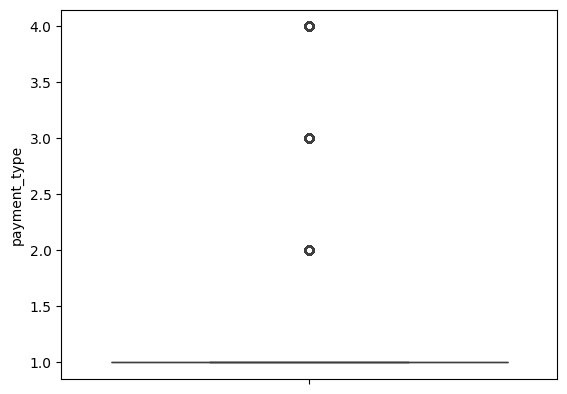

In [25]:
# remove passenger_count > 6
print('\n\nPassenger_count distinct values and its distribution')
print(df['passenger_count'].value_counts())

dfxtmp=df.copy()
dfxtmp = dfxtmp[dfxtmp['passenger_count']<=6]
df =dfxtmp.copy()
del dfxtmp

print('\n\nPassenger_count distinct values and its distribution after removing passenger_count>6')
print(df['passenger_count'].value_counts())


#Remove outlier payment_type=0
df = df[df['payment_type'] !=0]

sns.boxplot(df.payment_type)



Removing rows having trip_distance > 6000
After handing outlier 
Removing rows having trip_distance > 200


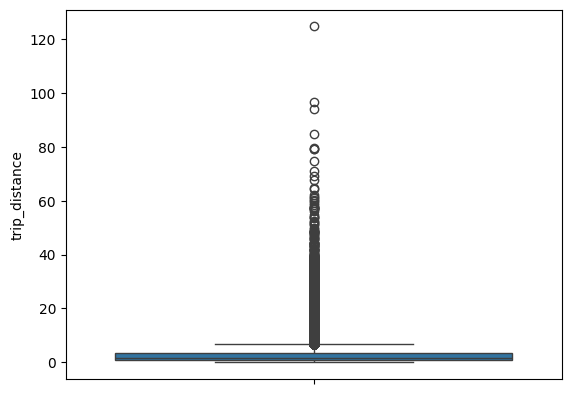

In [33]:
# Continue with outlier handling
sns.boxplot(df.trip_distance)
print('Removing rows having trip_distance > 6000')
df = df[df['trip_distance']<6000]
print('After handing outlier ')

print('Removing rows having trip_distance > 200')
df = df[df['trip_distance']<200]


In [35]:
# Do any columns need standardising?


dftmpx1=df.copy()
print('\n\npayment_type distinct values and its distribution')
print(dftmpx1['payment_type'].value_counts())

print('\nDeleting rows having incorrect payment type')
dftmpx1=dftmpx1[dftmpx1.payment_type.between(1,6)]

print('\n\nAfter deleting incorrect payment_type : payment_type distinct values and its distribution')
print(dftmpx1['payment_type'].value_counts())

df=dftmpx1.copy()
del dftmpx1





payment_type distinct values and its distribution
payment_type
1    238356
2     50302
4      2241
3      1413
Name: count, dtype: int64
D

eleting rows having incorrect payment type


After deleting incorrect payment_type : payment_type distinct values and its distribution
payment_type
1    238356
2     50302
4      2241
3      1413
Name: count, dtype: int64


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [36]:

df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee',
 'Airport_Fee_Comb']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

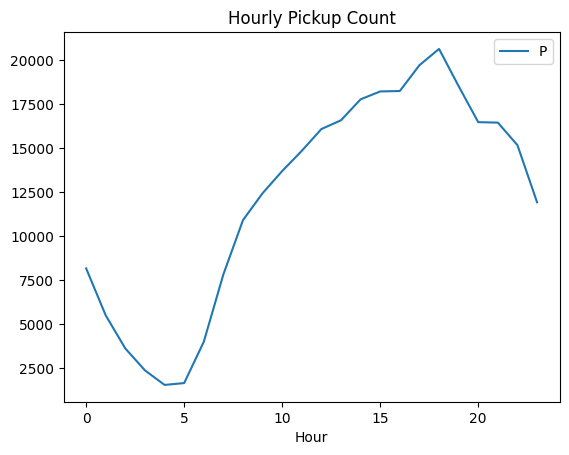

In [37]:
# Find and show the hourly trends in taxi pickups

df['Hour']=df['tpep_pickup_datetime'].dt.hour
pd.Series(df['Hour']).value_counts().sort_index().plot.line()
#pd.value_counts(df['Hour']).sort_index().plot.line()
plt.legend('Pickup Hour')
plt.title('Hourly Pickup Count')
plt.show()


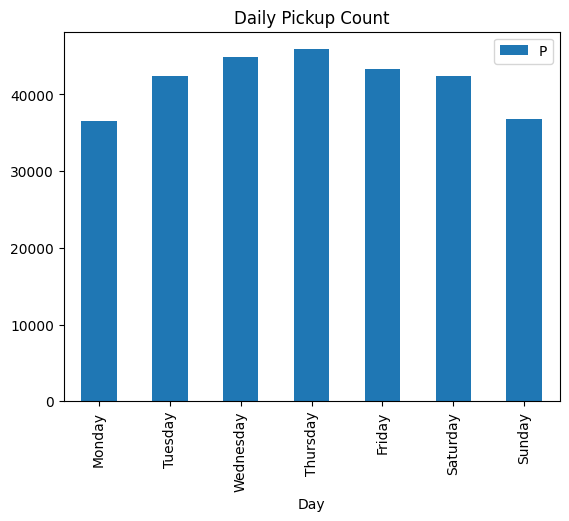

In [38]:
# Find and show the daily trends in taxi pickups (days of the week)

daynames=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['Day']=df['tpep_pickup_datetime'].dt.day_name()
df['Day'] = pd.Categorical(df['Day'], categories=daynames, ordered=True)
pd.Series(df['Day']).value_counts().sort_index().plot.bar()
#pd.value_counts(df['Day']).sort_index().plot.line()
plt.legend('Pickup Day')
plt.title('Daily Pickup Count')

plt.show()



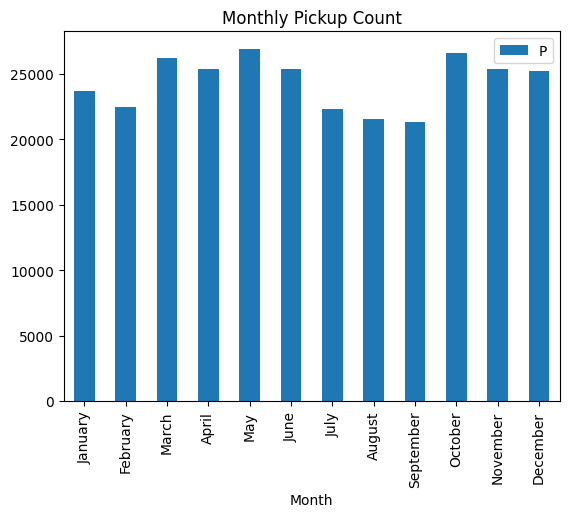

In [39]:
# Show the monthly trends in pickups
import plotly.graph_objs as go

layout = go.Layout(
    xaxis=dict(
        title='Month',
        tickmode='linear'))

monthnames = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

df['Month']=df['tpep_pickup_datetime'].dt.month_name()
df['Month'] = pd.Categorical(df['Month'], categories=monthnames, ordered=True)

pd.Series(df['Month']).value_counts().sort_index().plot.bar()
#pd.value_counts(df['Day']).sort_index().plot.line()
plt.legend('Pickup Month')
plt.title('Monthly Pickup Count')
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [40]:
# Analyse the above parameters
fin_df_all=df[['tpep_pickup_datetime','fare_amount','tip_amount','total_amount','trip_distance']].copy()

print('\n\nfare_amount values and count where value<=0')
print(fin_df_all[fin_df_all['fare_amount']<=0]['fare_amount'].value_counts())

print('\n\n\ntip_amount values and count where value<=0')
print(fin_df_all[fin_df_all['tip_amount']<=0]['tip_amount'].value_counts())

print('\n\ntotal_amount values and count where value<=0')
print(fin_df_all[fin_df_all['total_amount']<=0]['total_amount'].value_counts())

print('\n\ntrip_distance values and count where value<=0')
print(fin_df_all[fin_df_all['trip_distance']<=0]['trip_distance'].value_counts())





fare_amount values and count where value<=0
fare_amount
0.0    105
Name: count, dtype: int64



tip_amount values and count where value<=0
tip_amount
0.0    65224
Name: count, dtype: int64


total_amount values and count where value<=0
total_amount
0.0    40
Name: count, dtype: int64


trip_distance values and count where value<=0
trip_distance
0.0    3642
Name: count, dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [43]:
# Create a df with non zero entries for the selected parameters.
dforig_copy=df.copy()
print('\n\n\nWe are not deleting records having trip_distnace =0 and tip_amount =0, as those are genuine value.')

print('\n\n\nIt is worth leaving amount rows having fare_amount and total_amount =0')
fin_df=fin_df_all[fin_df_all['fare_amount']>0].copy()
fin_df=fin_df[fin_df['total_amount']>0]


print('\n\n\nData After removing zero fare_amount , total_amount')
fin_df.describe()

print('\n\n\nfare_amount values and count where value=0')
print(fin_df[fin_df['fare_amount']==0]['fare_amount'].value_counts())

print('\n\n\ntotal_amount values and count where value=0')
print(fin_df[fin_df['total_amount']==0]['total_amount'].value_counts())






We are not deleting records having trip_distnace =0 and tip_amount =0, as those are genuine value.



It is worth leaving amount rows having fare_amount and total_amount =0



Data After removing zero fare_amount , total_amount



fare_amount values and count where value=0
Series([], Name: count, dtype: int64)



total_amount values and count where value=0
Series([], Name: count, dtype: int64)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

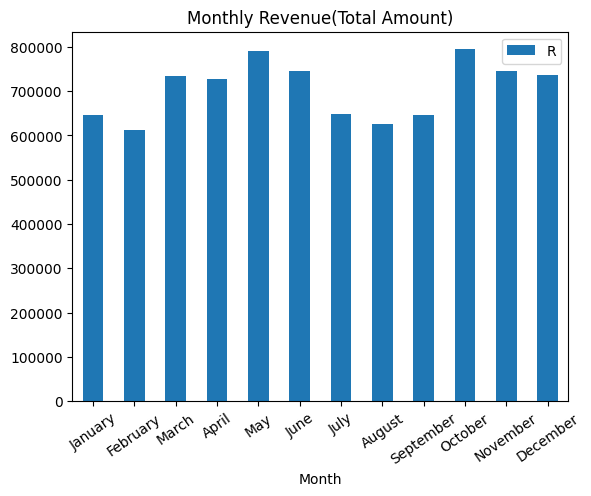

In [44]:
# Group data by month and analyse monthly revenue
#print(fin_df.describe())

fin_df['Month']=fin_df['tpep_pickup_datetime'].dt.month_name()
fin_df['Month'] = pd.Categorical(fin_df['Month'], categories=monthnames, ordered=True)

tmp_df=fin_df
tmp_df=tmp_df.drop(columns=['tpep_pickup_datetime','fare_amount','tip_amount','trip_distance'])
grp1 = tmp_df.groupby('Month', sort=False)["total_amount"].sum().reset_index(name ='total_amount')
grp1['Month'] = pd.Categorical(grp1['Month'], categories=monthnames, ordered=True)
#print(grp1.head(12))

grp1.set_index('Month', inplace=True)
grp1.sort_index().plot.bar(rot=35)
plt.legend('Revenue(Total_amount')
plt.title('Monthly Revenue(Total Amount)')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  tpep_pickup_datetime  Total Quarterly Amount
0               2023Q1              1990935.42
1               2023Q2              2262966.51
2               2023Q3              1919205.40
3               2023Q4              2275593.71


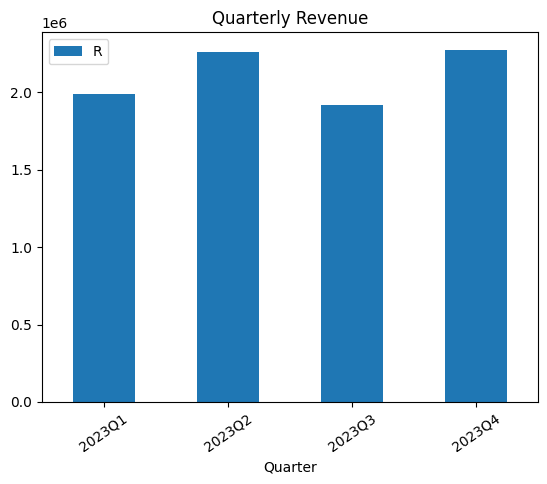

In [45]:
# Calculate proportion of each quarter
qgrp=fin_df.groupby(fin_df['tpep_pickup_datetime'].dt.to_period('Q'))['total_amount'].sum().reset_index(name='Total Quarterly Amount')

print(qgrp.head(100))

qgrp.set_index('tpep_pickup_datetime', inplace=True)
qgrp.sort_index().plot.bar(rot=35)
plt.legend('Revenue(Total_amount')
plt.title('Quarterly Revenue')
plt.xlabel('Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0


Trip fare & Distance (for trips having distance !=0)


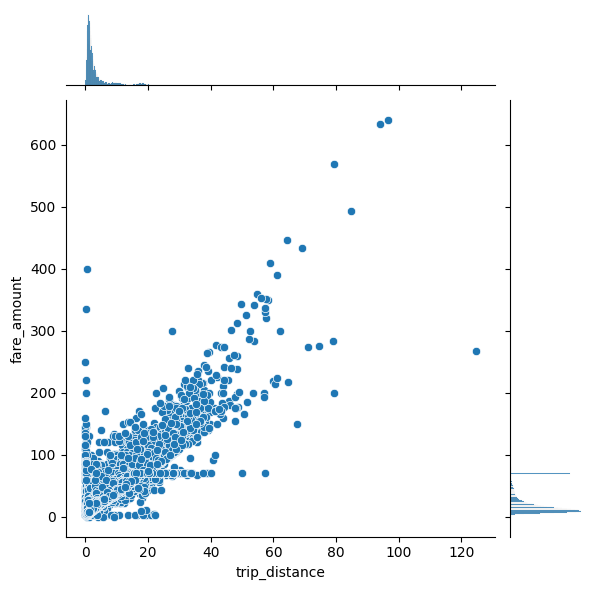

In [52]:
# Show how trip fare is affected by distance
#print(fin_df.head(10))
#plt.scatter(fin_df[fin_df['trip_distance']<200].trip_distance, fin_df[fin_df['trip_distance']<200].fare_amount)plt.show()

print('\nTrip fare & Distance (for trips having distance !=0)')
sns.jointplot(x='trip_distance', y='fare_amount',data=fin_df[ fin_df['trip_distance']>0])
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

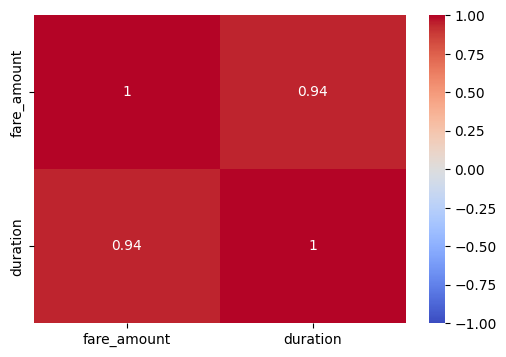

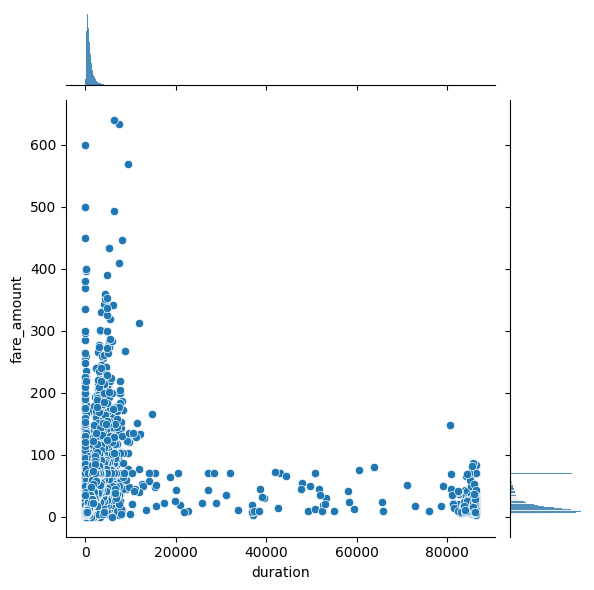

In [55]:
# Show relationship between fare and trip duration

tmp_df1=df[['fare_amount']]
tmp_df1['duration']=df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
tmp_df1['duration']=tmp_df1['duration'].dt.seconds


plt.figure(figsize=(6,4))
sns.heatmap(tmp_df1.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()


sns.jointplot(x = 'duration', y='fare_amount', data = tmp_df1)
#plt.scatter(tmp_df1.duration.dt.seconds, tmp_df1.fare_amount)
#plt.ylabel('Fare Amount')
#plt.xlabel('Duration(sec)')
#plt.label('Fare Amount & Trip Duration relation')
plt.show()


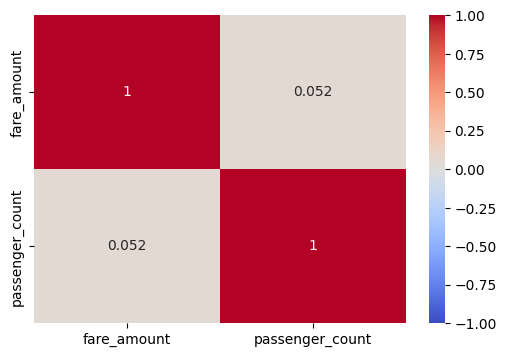

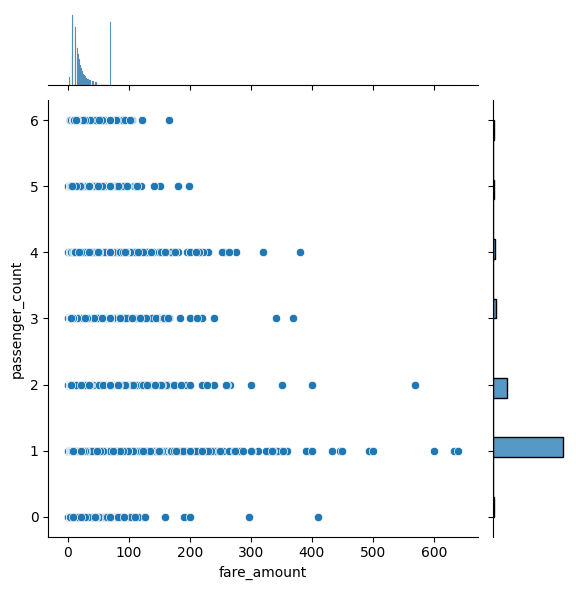

In [56]:
# Show relationship between fare and number of passengers

#df.info()
tmp_df2=df[['fare_amount','passenger_count']]
plt.figure(figsize=(6,4))
sns.heatmap(tmp_df2.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

sns.jointplot(x = 'fare_amount', y='passenger_count', data = tmp_df2)
#plt.scatter(tmp_df2.fare_amount, tmp_df2.passenger_count)
#plt.xlabel('Fare Amount')
#plt.ylabel('passenger_count')
##plt.label('Fare Amount & Trip Duration relation')
plt.show()

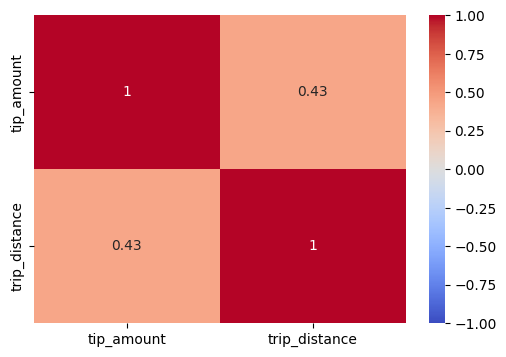

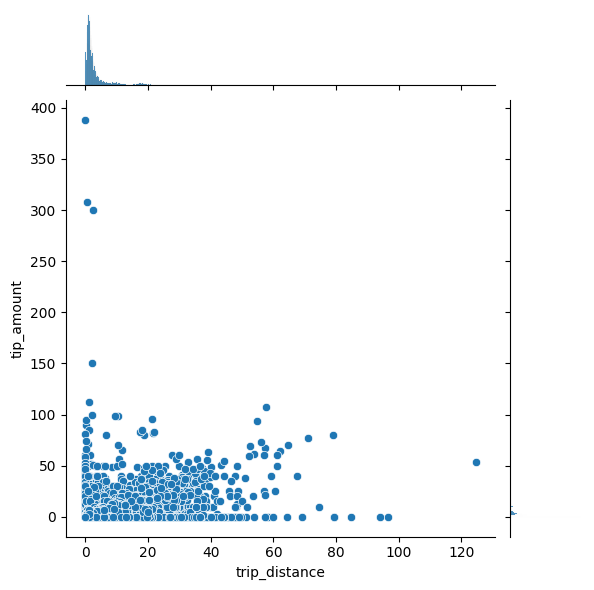

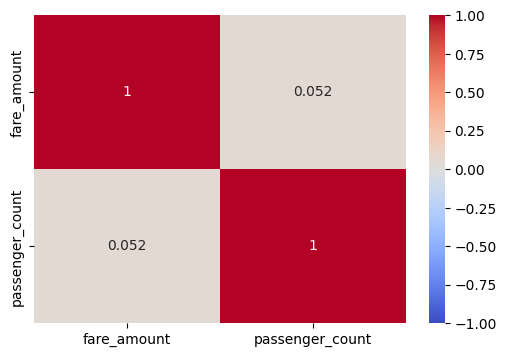

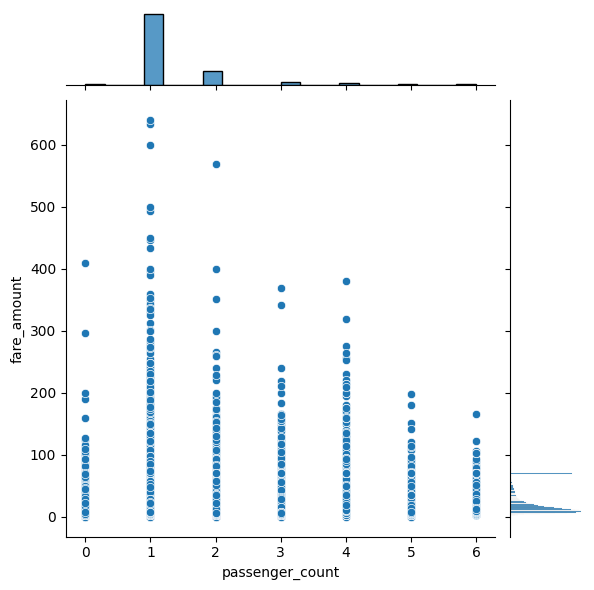

In [57]:
# Show relationship between tip and trip distance
tmp_df2=df[['tip_amount','trip_distance']]
plt.figure(figsize=(6,4))
sns.heatmap(tmp_df2.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

sns.jointplot(x = 'trip_distance', y='tip_amount', data = tmp_df2)
plt.show()

# Show relationship between fare and number of passengers

tmp_df2=df[['fare_amount','passenger_count']]
plt.figure(figsize=(6,4))
sns.heatmap(tmp_df2.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

sns.jointplot(x = 'passenger_count', y='fare_amount', data = tmp_df2)
plt.show()

del tmp_df2

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)




Payment Type Distribution 
   payment_type   Count PaymentTypeVal
0             1  238356    Credit Card
1             2   50302           Cash
2             3    1413      No Charge
3             4    2241        Dispute


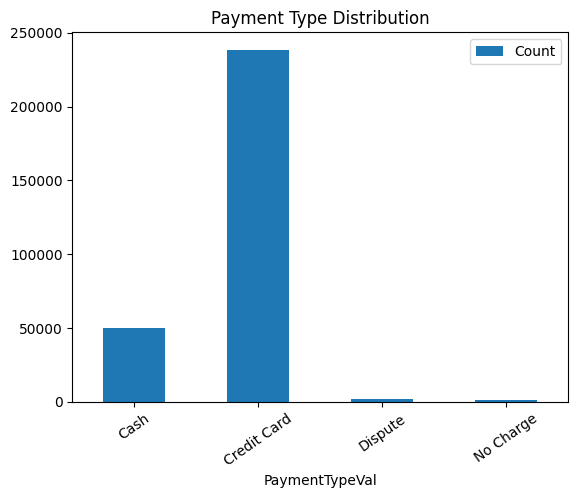

In [59]:
# Analyse the distribution of different payment types (payment_type).

def paymentType_num2cat(val):
    if val == 1:
        return "Credit Card"
    elif val == 2:
        return "Cash"
    elif val == 3:
        return "No Charge"
    elif val == 4:
        return "Dispute"
    elif val == 5:
        return "Unknown"
    elif val == 6:
        return "Voided trip"

df['PaymentTypeVal'] = df.apply(lambda row: paymentType_num2cat(row['payment_type']), axis = 1)

pgrp=df.groupby(df['payment_type'])['payment_type'].count().reset_index(name='Count')
pgrp['PaymentTypeVal'] = pgrp.apply(lambda row: paymentType_num2cat(row['payment_type']), axis = 1)

print("\n\n\nPayment Type Distribution ")
print(pgrp.head(10))

#sns.boxplot(data=df, x='PaymentTypeVal')
#plt.xlabel('Payment Type')
#plt.title('payment_type distribution')
#plt.show()

pgrp=pgrp.drop(columns=['payment_type'])
pgrp.set_index('PaymentTypeVal', inplace=True)
pgrp.sort_index().plot.bar(rot=35)
#plt.legend('Number of payments made')
plt.title('Payment Type Distribution')
plt.show()

del pgrp

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [60]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [69]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
shapefile='../taxi_zones/taxi_zones.shp'
zones = gpd.read_file(shapefile)# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.



zone Schema : 
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None





<Axes: >

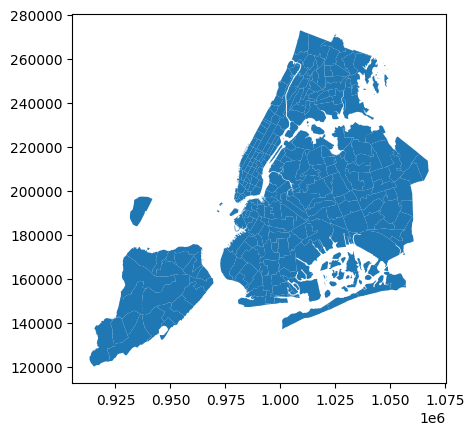

In [70]:
# print(zones.info())
print("\n\nzone Schema : ")
print(zones.info())
print("\n\n")
# zones.plot()
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [71]:
# Merge zones and trip records using locationID and PULocationID

mergeddf = pd.merge(df, zones.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="left")
#df = pd.merge(df, df_loc.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="left")
print('\n\n\nData Size after merging taxi and zones data: ', len(mergeddf))
#mergeddf.head()
mergeddf.info()




Data Size after merging taxi and zones data:  292334
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292334 entries, 0 to 292333
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               292334 non-null  int64         
 1   tpep_pickup_datetime   292334 non-null  datetime64[us]
 2   tpep_dropoff_datetime  292334 non-null  datetime64[us]
 3   passenger_count        292334 non-null  float64       
 4   trip_distance          292334 non-null  float64       
 5   RatecodeID             292334 non-null  float64       
 6   PULocationID           292334 non-null  int64         
 7   DOLocationID           292334 non-null  int64         
 8   payment_type           292334 non-null  int64         
 9   fare_amount            292334 non-null  float64       
 10  extra                  292334 non-null  float64       
 11  mta_tax                292334 non-null  float64 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [72]:
# Group data by location and calculate the number of trips

print('\n\n')
mergedgrp=mergeddf.groupby(mergeddf['PULocationID'])['PULocationID'].count().reset_index(name='TripCount')
print('\n\n')
mergedgrp.info()
print('\n\n')
mergedgrp.head(255)







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PULocationID  242 non-null    int64
 1   TripCount     242 non-null    int64
dtypes: int64(2)
memory usage: 3.9 KB





,PULocationID,TripCount
0,1,34
1,3,7
2,4,327
3,5,5
4,6,2
...,...,...
237,261,1498
238,262,3865
239,263,5558
240,264,2756


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [73]:
# Merge trip counts back to the zones GeoDataFrame
zones=pd.merge(zones, mergedgrp, left_on="LocationID", right_on="PULocationID", how="inner")
# pending- replace trip count nan by 0 in zones
print("Merged TripCount into zones dataframe\n\n")
zones.info()

Merged TripCount into zones dataframe


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      240 non-null    int32   
 1   Shape_Leng    240 non-null    float64 
 2   Shape_Area    240 non-null    float64 
 3   zone          240 non-null    object  
 4   LocationID    240 non-null    int32   
 5   borough       240 non-null    object  
 6   geometry      240 non-null    geometry
 7   PULocationID  240 non-null    int64   
 8   TripCount     240 non-null    int64   
dtypes: float64(2), geometry(1), int32(2), int64(2), object(2)
memory usage: 15.1+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

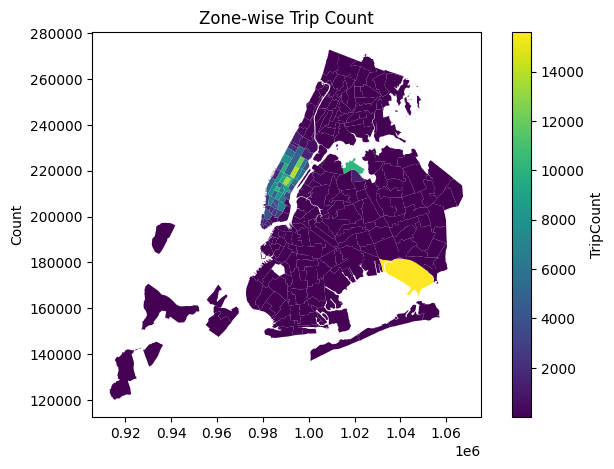

In [74]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (8, 5))

# Plot the map and display it
zones.plot(ax = ax,column = 'TripCount', legend = True, legend_kwds = {'label': "TripCount", 'orientation': "vertical"})
plt.title('Zone-wise Trip Count')
plt.ylabel('Count')
plt.show()

In [75]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values(by=['TripCount']).tail(10)



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,TripCount
156,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",170,8772
209,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",230,9612
129,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",142,9715
170,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",186,10116
125,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",138,10233
148,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162,10337
215,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236,12129
147,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161,13683
216,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237,13926
119,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132,15604


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [58]:
# Find routes which have the slowest speeds at different times of the day

### hour, POlocation, DOlocation, trip_distance, tpep_dropoff_datetime, tpep_pickup_datetime
speed_df_meta=mergeddf.reindex(columns=['Hour', 'PULocationID', 'DOLocationID', 'trip_distance', 'tpep_dropoff_datetime', 'tpep_pickup_datetime'])
speed_df_meta['TripDuration']=speed_df_meta['tpep_dropoff_datetime'] - speed_df_meta['tpep_pickup_datetime']
speed_df_meta['Route']=str(speed_df_meta['PULocationID'])+"-"+str(speed_df_meta['DOLocationID'])

speed_df=speed_df_meta.reindex(columns=['Hour','trip_distance','Route','TripDuration'])
speed_df_fin=speed_df.groupby(['Hour','Route','trip_distance'])['TripDuration'].aggregate(['mean']).reset_index()  #agg({'TripDuration':'mean'}).reset_index()

#V - compute speed
speed_df_fin['Speed'] = speed_df_fin['trip_distance']/speed_df_fin['mean'].dt.total_seconds()

slowest_speed_athours=speed_df_fin.groupby(['Hour'])['Speed'].aggregate(['min']).reset_index()

##pending ----*****
#for i in speed_df_fin.index :
  #  print(speed_df_fin['Hour'][i], speed_df_fin['Route'][i])

#for hr,spd in slowest_speed_athours['Hour','Speed']:
#    slowest_speed_routes=speed_df_fin[speed_df_fin['Hour']==hr,speed_df_fin['Speed']==spd ]


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

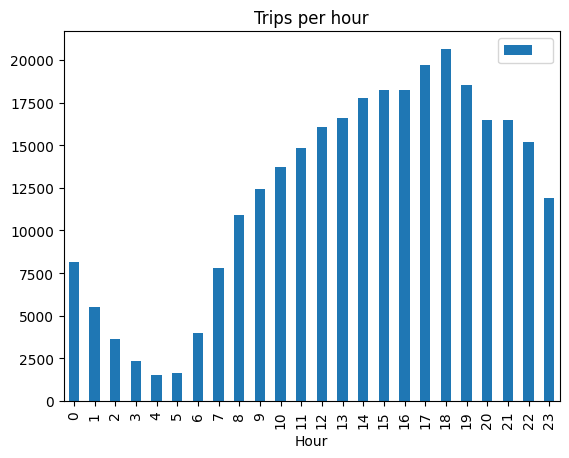

Busiest Hour= 18


In [59]:
# Visualise the number of trips per hour and find the busiest hour
### ** clarification needed , trip completed or just started
df['Hour']=df['tpep_pickup_datetime'].dt.hour
s=pd.Series(df['Hour']).value_counts().sort_index()
s.plot.bar()
##pd.value_counts(df['Hour']).sort_index().plot.line()
plt.legend(' Hour')
plt.title('Trips per hour')
plt.show()
print('Busiest Hour=',s.idxmax())

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [91]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = sampling_fract
s=pd.Series(df['Hour']).value_counts().sort_values(ascending=False)
a1=s.idxmax()
print(a1," ",s[a1])
actual1=(1/sample_fraction)*s[a1]
print("AfterScaleup = ",actual1)

s2 = s.drop(a1)
a2=s2.idxmax()
print(a2," ",s2[a2])
actual2=(1/sample_fraction)*s2[a2]
print("AfterScaleup = ",actual2)

s3 = s2.drop(a2)
a3=s3.idxmax()
print(a3," ",s3[a3])
actual3=(1/sample_fraction)*s3[a3]
print("AfterScaleup = ",actual3)


s4 = s3.drop(a3)
a4=s4.idxmax()
print(a4," ",s4[a4])
actual4=(1/sample_fraction)*s4[a4]
print("AfterScaleup = ",actual4)

s5 = s4.drop(a4)
a5=s5.idxmax()
print(a5," ",s5[a5])
actual5=(1/sample_fraction)*s5[a5]
print("AfterScaleup = ",actual5)



18   20641
AfterScaleup =  2580125.0
17   19714
AfterScaleup =  2464250.0
19   18524
AfterScaleup =  2315500.0
16   18247
AfterScaleup =  2280875.0
15   18224
AfterScaleup =  2278000.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

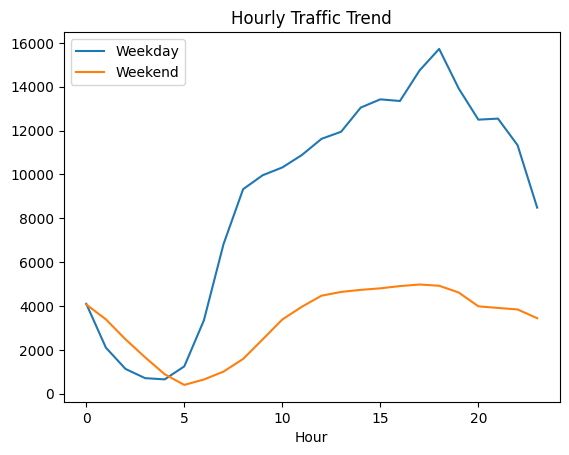

In [92]:
# Compare traffic trends for the week days and weekends
isweekend={'Monday':'N','Tuesday':'N','Wednesday':'N','Thursday':'N','Friday':'N','Saturday':'Y','Sunday':'Y'}
mergeddf['isWeekend']=mergeddf['Day'].apply(lambda x : isweekend[x])
weekday_df=mergeddf[mergeddf['isWeekend']=='N']
weekend_df=mergeddf[mergeddf['isWeekend']=='Y']


s1=pd.Series(weekday_df['Hour']).value_counts().sort_index()
s2=pd.Series(weekend_df['Hour']).value_counts().sort_index()


plt.plot(s1, label='Weekday')
plt.plot(s2, label='Weekend')
plt.legend()
plt.xlabel('Hour');
#plt.ylabel('Trips');
plt.title('Hourly Traffic Trend')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [94]:
# Find top 10 pickup and dropoff zones
pickupdf=mergeddf[['PUzone']]
top10_pickup=pickupdf.groupby(['PUzone']).count().reset_index().sort_values('PUzone',ascending=False).head(10) #.tail(1)
print('\n\nTop 10 Pickup Zones:\n',top10_pickup)


#pd.merge(df, zones.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="left")
mergeddf_bydrop = pd.merge(df, zones.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="left")
dropdf=mergeddf_bydrop[['DOzone']]
top10_drop=dropdf.groupby(['DOzone']).count().reset_index().sort_values('DOzone',ascending=False).head(10) #.tail(1)
print('\n\nTop 10 Drop Zones:\n',top10_drop)






Top 10 Pickup Zones:
                         PUzone
238             Yorkville West
237             Yorkville East
236         World Trade Center
235                   Woodside
234         Woodlawn/Wakefield
233                  Woodhaven
232            Windsor Terrace
231  Williamsburg (South Side)
230  Williamsburg (North Side)
229   Williamsbridge/Olinville


Top 10 Drop Zones:
                         DOzone
238             Yorkville West
237             Yorkville East
236         World Trade Center
235                   Woodside
234         Woodlawn/Wakefield
233                  Woodhaven
232            Windsor Terrace
231  Williamsburg (South Side)
230  Williamsburg (North Side)
229   Williamsbridge/Olinville


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#Fails....
#pickdrop_df=pd.merge(pickupdf.add_prefix('pk_'), dropdf.add_prefix('dp_'), left_on="pk_PUzone", right_on="dp_DOzone",how="inner")
#pickdrop_df.info()



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [95]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
#print(mergeddf['Hour'])


#n_pickupdf=mergeddf[mergeddf['Hour'].between(11, 5)][['PUzone']]
n_pickupdf=mergeddf[(mergeddf['Hour'].between(23, 24)) | (mergeddf['Hour'].between(1, 5))][['PUzone']]
n_top10_pickup=n_pickupdf.groupby(['PUzone']).count().reset_index().sort_values('PUzone',ascending=False).head(10) #.tail(1)
print('\n\n\nTop 10 Pickup Zones @Night:',n_top10_pickup)



n_mergeddf_bydrop = pd.merge(df, zones.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="inner")
#n_dropdf=mergeddf_bydrop[mergeddf_bydrop['DOzone'].between(11, 5)][['DOzone']]
n_dropdf=mergeddf_bydrop[(mergeddf_bydrop['Hour'].between(23, 24)) | (mergeddf_bydrop['Hour'].between(1, 5))][['DOzone']]
n_top10_drop=dropdf.groupby(['DOzone']).count().reset_index().sort_values('DOzone',ascending=False).head(10) #.tail(1)
print('\n\n\nTop 10 Drop Zones @ Night:',n_top10_drop)






Top 10 Pickup Zones @Night:                             PUzone
176                 Yorkville West
175                 Yorkville East
174             World Trade Center
173                       Woodside
172                      Woodhaven
171                Windsor Terrace
170      Williamsburg (South Side)
169      Williamsburg (North Side)
168  Westchester Village/Unionport
167                   West Village



Top 10 Drop Zones @ Night:                         DOzone
238             Yorkville West
237             Yorkville East
236         World Trade Center
235                   Woodside
234         Woodlawn/Wakefield
233                  Woodhaven
232            Windsor Terrace
231  Williamsburg (South Side)
230  Williamsburg (North Side)
229   Williamsbridge/Olinville


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [96]:
# Filter for night hours (11 PM to 5 AM)

n_pickup_rvdf=mergeddf[(mergeddf['Hour'].between(23, 24)) | (mergeddf['Hour'].between(1, 5))][['fare_amount']]


d_pickup_rvdf=mergeddf[mergeddf['Hour'].between(6, 22)][['fare_amount']]


nighrevenue = n_pickup_rvdf.sum()
dayrevenue = d_pickup_rvdf.sum()

print('\n\nTotal Day Time Revenue',dayrevenue.fare_amount)
print('\n\nTotal Night Time Revenue',nighrevenue.fare_amount)


#datavals = {'Duration':['D','N'],'FareAmount':[dayrevenue.fare_amount,nighrevenue.fare_amount]}
#dndf=pd.DataFrame(datavals)

# need to fix x labels ...
#dndf.plot(kind="hist")
#plt.xlabel=datavals['Duration']
#plt.title('Revenue Share(fare_amount)')
#plt.show()




Total Day Time Revenue 5072399.34


Total Night Time Revenue 542008.96


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.



Fare per mile per pessanger
                 Fare_permile_perpessenger
passenger_count                           
2.0                               3.327751
3.0                               2.251090
4.0                               1.710815
5.0                               1.348119
6.0                               1.143191


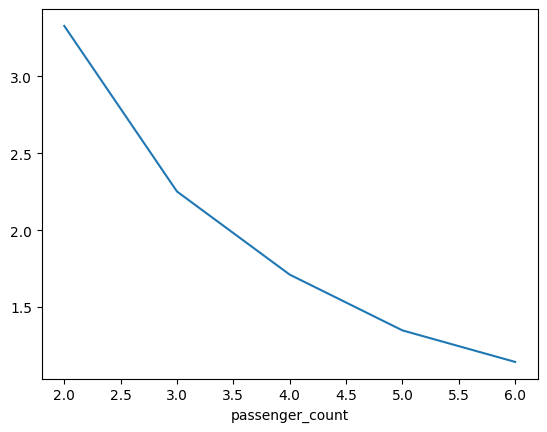

In [97]:
# Analyse the fare per mile per passenger for different passenger counts

dffx1=df.copy()
dffx1=dffx1[dffx1.passenger_count>0 | dffx1.passenger_count.notna()]
dffx1=dffx1[dffx1.fare_amount>0 | dffx1.fare_amount.notna()]
dffx1=dffx1[dffx1.trip_distance>0 | dffx1.trip_distance.notna()]


dffx1['Fare_permile_perpessenger']=(dffx1['fare_amount']/dffx1['trip_distance'])/dffx1['passenger_count']


dffx=dffx1[['Fare_permile_perpessenger','passenger_count']].copy()
dffx.reset_index()
avg=dffx.groupby('passenger_count').mean()

print("\n\nFare per mile per pessanger")
print(avg.head(20))

avg['Fare_permile_perpessenger'].plot()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

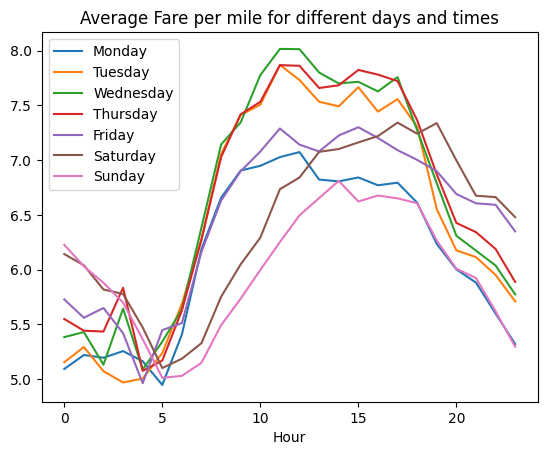

In [185]:
# Compare the average fare per mile for different days and for different times of the day


## needa fix
dffx1=df.copy()
#dffx1=dffx1[dffx1.passenger_count>0 | dffx1.passenger_count.notna()]
dffx1=dffx1[dffx1.fare_amount>0 | dffx1.fare_amount.notna()]
dffx1=dffx1[dffx1.trip_distance>0 | dffx1.trip_distance.notna()]

dffx1['fare_per_mile']=dffx1['fare_amount']/dffx1['trip_distance']

dffperm=dffx1.groupby(['Day','Hour'])['fare_per_mile'].mean()

pdm1=dffperm['Monday']
pdm2=dffperm['Tuesday']
pdm3=dffperm['Wednesday']
pdm4=dffperm['Thursday']
pdm5=dffperm['Friday']
pdm6=dffperm['Saturday']
pdm7=dffperm['Sunday']

dfpdph=pd.DataFrame({'Monday':pdm1,'Tuesday':pdm2,'Wednesday':pdm3,'Thursday':pdm4,'Friday':pdm5,'Saturday':pdm6,'Sunday':pdm7})
dfpdph.plot()
plt.xlabel('Hour')
plt.title('Average Fare per mile for different days and times')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day



Avg. Fare-per-mile for different vendors
VendorID
1    6.685970
2    6.797567
Name: fare_per_mile, dtype: float64





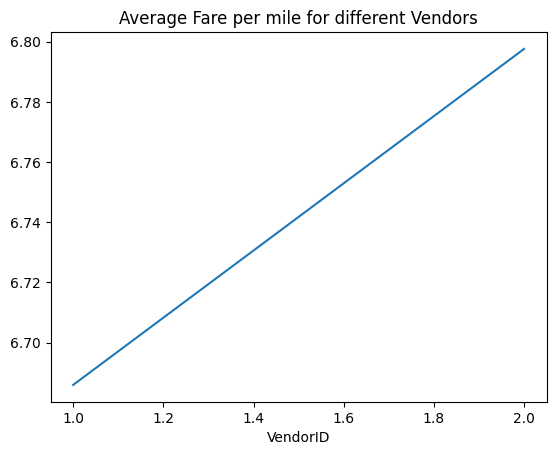

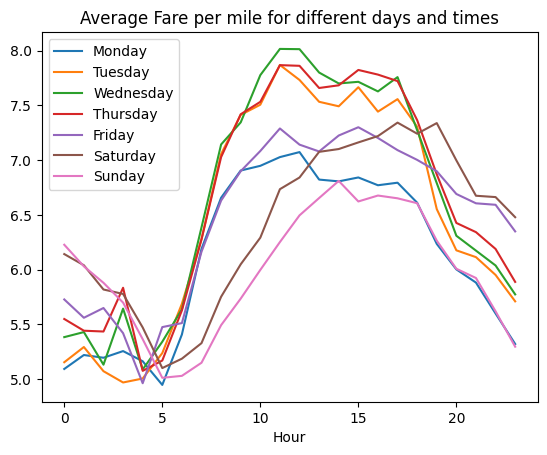

In [98]:
# Compare fare per mile for different vendors

dffx1=df.copy()
dffx1=dffx1[dffx1.trip_distance>0 | dffx1.trip_distance.notna()]
dffx1=dffx1[dffx1.fare_amount>0 | dffx1.fare_amount.notna()]
dffx1=dffx1[dffx1.VendorID.notna()]

dffx1['fare_per_mile']=dffx1['fare_amount']/dffx1['trip_distance']


dffperm=dffx1.groupby(['VendorID'])['fare_per_mile'].mean()

print("\n\nAvg. Fare-per-mile for different vendors")
print(dffperm.head(30))
print("\n\n")

#dfpdph=pd.DataFrame({'Monday':pdm1,'Tuesday':pdm2,'Wednesday':pdm3,'Thursday':pdm4,'Friday':pdm5,'Saturday':pdm6,'Sunday':pdm7})
dffperm.plot()
plt.xlabel('VendorID')
plt.title('Average Fare per mile for different Vendors')
plt.show()


# Compare the average fare per mile for different days and for different times of the day
dffx1=df.copy()

dffx1=dffx1[dffx1.fare_amount>0 | dffx1.fare_amount.notna()]
dffx1=dffx1[dffx1.trip_distance>0 | dffx1.trip_distance.notna()]

dffx1['fare_per_mile']=dffx1['fare_amount']/dffx1['trip_distance']

dffperm=dffx1.groupby(['Day','Hour'])['fare_per_mile'].mean()

pdm1=dffperm['Monday']
pdm2=dffperm['Tuesday']
pdm3=dffperm['Wednesday']
pdm4=dffperm['Thursday']
pdm5=dffperm['Friday']
pdm6=dffperm['Saturday']
pdm7=dffperm['Sunday']

dfpdph=pd.DataFrame({'Monday':pdm1,'Tuesday':pdm2,'Wednesday':pdm3,'Thursday':pdm4,'Friday':pdm5,'Saturday':pdm6,'Sunday':pdm7})
dfpdph.plot()
plt.xlabel('Hour')
plt.title('Average Fare per mile for different days and times')
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

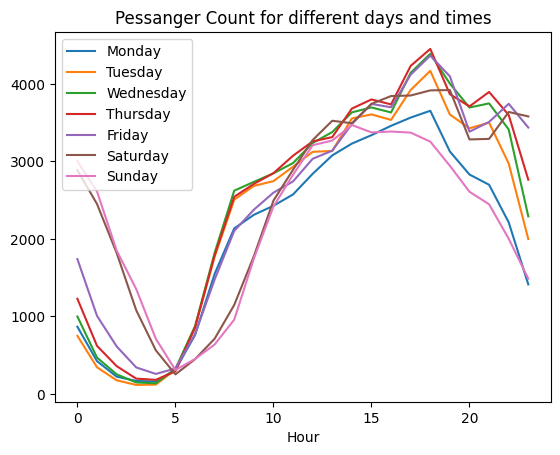

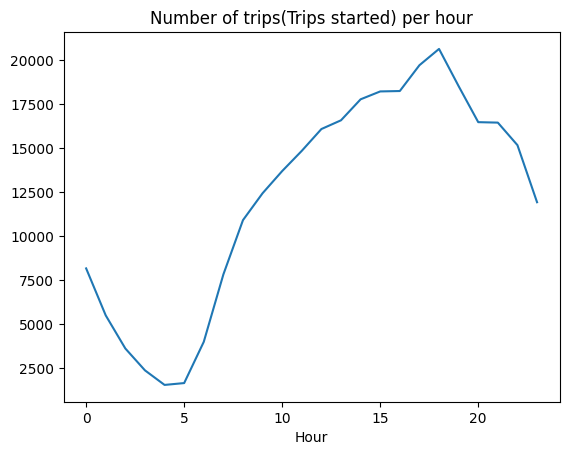

In [100]:
# See how passenger count varies across hours and days



dffx1=df.copy()


dffperm=dffx1.groupby(['Day','Hour'])['passenger_count'].sum()

pdm1=dffperm['Monday']
pdm2=dffperm['Tuesday']
pdm3=dffperm['Wednesday']
pdm4=dffperm['Thursday']
pdm5=dffperm['Friday']
pdm6=dffperm['Saturday']
pdm7=dffperm['Sunday']

dfpdph=pd.DataFrame({'Monday':pdm1,'Tuesday':pdm2,'Wednesday':pdm3,'Thursday':pdm4,'Friday':pdm5,'Saturday':pdm6,'Sunday':pdm7})
dfpdph.plot()
plt.xlabel('Hour')
plt.title('Pessanger Count for different days and times')
plt.show()

# Visualise the number of trips per hour and find the busiest hour
### ** clarification needed , trip completed or just started
dffperm=dffx1.groupby('Hour')['Hour'].count()
dffperm.plot()
plt.xlabel('Hour')
plt.title('Number of trips(Trips started) per hour')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 zones w.r.t pessanger count
                         passenger_count
PUzone                                  
Allerton/Pelham Gardens              7.0
Alphabet City                      473.0
Arden Heights                        5.0
Arrochar/Fort Wadsworth              3.0
Astoria                            186.0
Astoria Park                         3.0
Auburndale                           1.0
Baisley Park                       134.0
Bath Beach                           5.0
Battery Park                       268.0


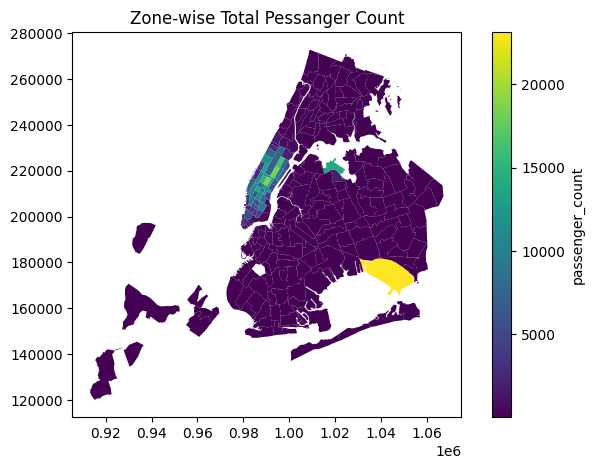

In [101]:
# How does passenger count vary across zones
psg_cnt=mergeddf[['PUzone','passenger_count']].groupby('PUzone').sum()
print('Top 10 zones w.r.t pessanger count')
print(psg_cnt.head(10))


zs=zones.copy()
zs1=pd.merge(zs, psg_cnt, left_on="zone", right_on="PUzone", how="inner")

fig, ax = plt.subplots(1, 1, figsize = (8, 5))
zs1.plot(ax = ax,column = 'passenger_count', legend = True, legend_kwds = {'label': "passenger_count", 'orientation': "vertical"})
plt.title('Zone-wise Total Pessanger Count')
plt.show()



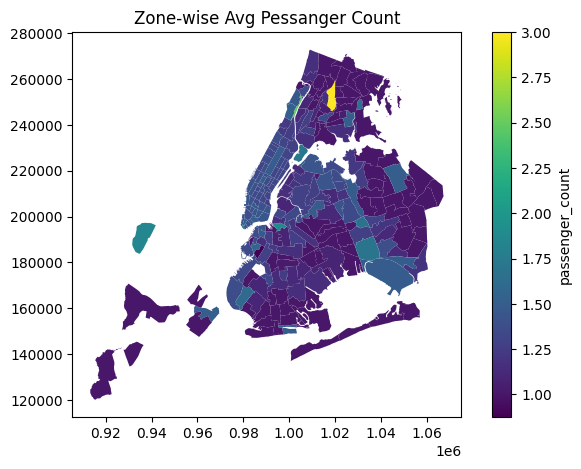

In [187]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


psg_cnt=mergeddf[['PUzone','passenger_count']].groupby('PUzone').mean()

zs=zones.copy()
zs1=pd.merge(zs, psg_cnt, left_on="zone", right_on="PUzone", how="inner")

fig, ax = plt.subplots(1, 1, figsize = (8, 5))
zs1.plot(ax = ax,column = 'passenger_count', legend = True, legend_kwds = {'label': "passenger_count", 'orientation': "vertical"})
plt.title('Zone-wise Avg Pessanger Count')
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.